## Chatbots With Langgraph

langgraph to create stateful multi actor applicn with llms used to create agent and multi agent workflos

compared to other llm frameworks offers core benefits :cycles,conrolablity and persisitence.allsows to define flows that invlove cycles essential for most agentic architectures differentiating it from DAG based

simplifies development state management nd aganet coordination
flexibilty to define ageny logic and coomunixcationprotocols
scalability large sale multiagent applln
Fault Tolerance handle erros


In [1]:
!pip install langgraph langsmith


   -------- ------------------------------- 1/5 [langgraph-sdk]
   ---------------- ----------------------- 2/5 [langgraph-checkpoint]
   ------------------------ --------------- 3/5 [langgraph-prebuilt]
   -------------------------------- ------- 4/5 [langgraph]
   -------------------------------- ------- 4/5 [langgraph]
   -------------------------------- ------- 4/5 [langgraph]
   -------------------------------- ------- 4/5 [langgraph]
   -------------------------------- ------- 4/5 [langgraph]
   ---------------------------------------- 5/5 [langgraph]



In [2]:
!pip install langchain langchain_groq langchain_community

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [59]:
# from google.colab import userdata
# groq_api_key=os.getenv('GROQ_API_KEY')
groq_api_key="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"
# langsmith=os.getenv('LANGSMITH_API_KEY')
langsmith="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"
print(langsmith)


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


In [60]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

In [61]:
from langchain_groq import ChatGroq

In [62]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000025633015C60>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002562962C850>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building Chatbot Using Langgraph

In [63]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [64]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [65]:
graph_builder

In [66]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [67]:
graph_builder.add_node("chatbot",chatbot)

In [68]:
graph_builder

In [69]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [70]:
graph=graph_builder.compile()

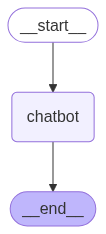

In [71]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [72]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content="Hello Shuhbro! 👋\n\nIt's nice to meet you. What can I do for you today? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 15, 'total_tokens': 44, 'completion_time': 0.052727273, 'prompt_time': 0.001899557, 'queue_time': 0.258087283, 'total_time': 0.05462683}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--5256bc4e-5b9d-479a-a14d-63f89d484bf7-0', usage_metadata={'input_tokens': 15, 'output_tokens': 29, 'total_tokens': 44})}])
content="Hello Shuhbro! 👋\n\nIt's nice to meet you. What can I do for you today? 😊  \n\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 15, 'total_tokens': 44, 'completion_time': 0.052727273, 'prompt_time': 0.001899557, 'queue_time': 0.258087283, 'total_time': 0.05462683}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d